In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
#from sklearn import metrics
from sklearn.model_selection import train_test_split
import seaborn as sns#for EDA

In [46]:
data = pd.read_csv("train1.csv")
data1 = pd.read_csv("test1.csv")

# Exploratory Data Analysis

In [59]:
data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005028,-0.035330,0.033008,-0.057686,-0.001657,0.012703
Survived,-0.005028,1.000000,-0.335549,-0.052051,-0.034040,0.083151,0.255290
Pclass,-0.035330,-0.335549,1.000000,-0.405549,0.081656,0.016824,-0.548193
Age,0.033008,-0.052051,-0.405549,1.000000,-0.242807,-0.170089,0.120938
SibSp,-0.057686,-0.034040,0.081656,-0.242807,1.000000,0.414542,0.160887
Parch,-0.001657,0.083151,0.016824,-0.170089,0.414542,1.000000,0.217532
Fare,0.012703,0.255290,-0.548193,0.120938,0.160887,0.217532,1.000000


In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data.isnull().head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False


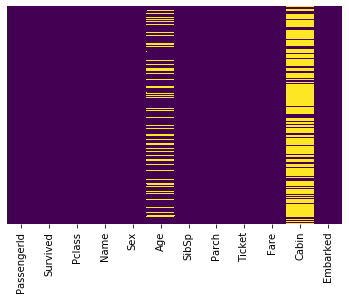

In [6]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

we can see a lot of data is missing in age and cabin coloumn so we cannot drop it.we might drop cabin coloumn sice a lot of data is missing and we cannot derive data as it might lead to false analysis.

now we are going to see various plots for getting parameter on which we can decide how to fix age 

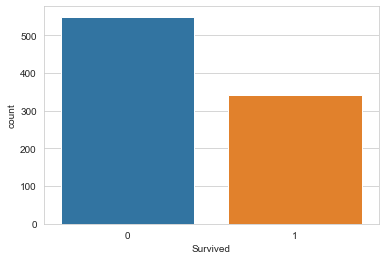

In [7]:
#since survived is the target so we will plot for survived 
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=data)


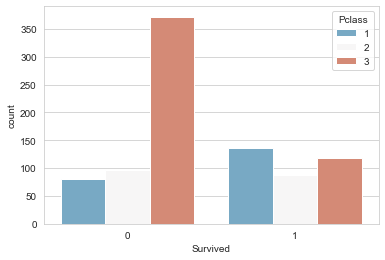

In [8]:
#now we will visualise target based on various parameters
sns.set_style('whitegrid')
sns.countplot(x ='Survived',hue='Pclass',data=data,palette='RdBu_r')

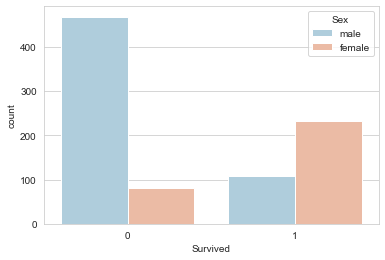

In [9]:
sns.set_style('whitegrid')
sns.countplot(x ='Survived',hue='Sex',data=data,palette='RdBu_r')

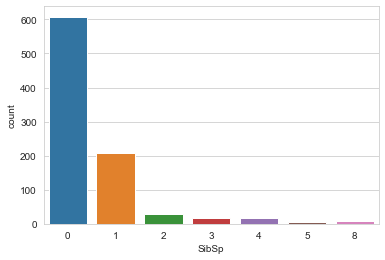

In [10]:
sns.countplot(x='SibSp',data=data)

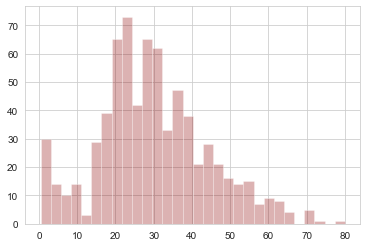

In [11]:
data['Age'].hist(bins=30,color='darkred',alpha=0.3)


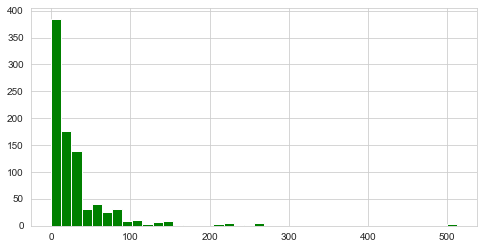

In [12]:
data['Fare'].hist(color='green',bins=40,figsize=(8,4))

In [13]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Data Cleaning

now in this section we need to find and remove outlier and fill the mising data

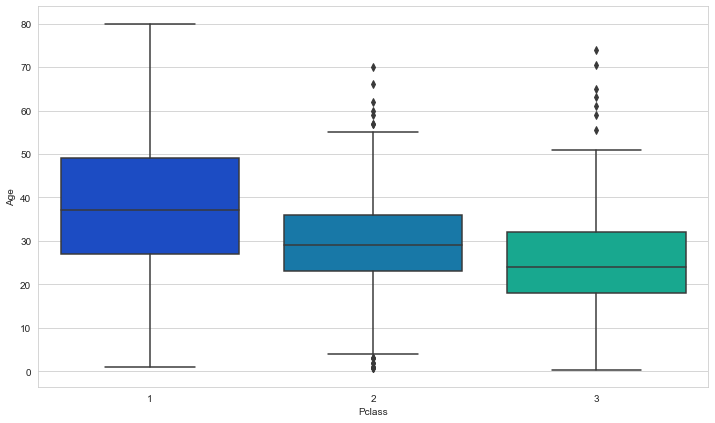

In [14]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=data,palette='winter')


We can see the wealthier passengers in the higher classes tend to be older, which makes sense. We'll use these average age values to impute based on Pclass for Age.

In [15]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [47]:
data['Age'] = data[['Age','Pclass']].apply(impute_age,axis=1)
data1['Age'] = data1[['Age','Pclass']].apply(impute_age,axis=1)


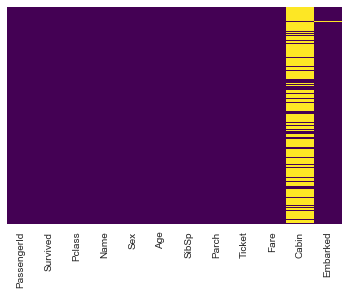

In [17]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [48]:
#dropping of cabin coloumn since a lot of data is missing
data = data.drop("Cabin", axis=1)
data1 = data1.drop("Cabin", axis=1)

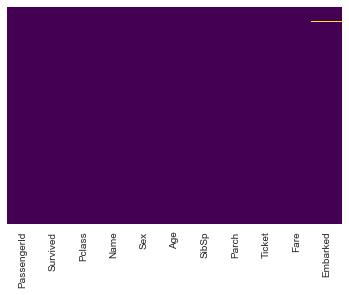

In [19]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [49]:
#still some data is missing so dropping off
data = data.dropna(how  = 'any')
data1 = data1.dropna(how  = 'any')

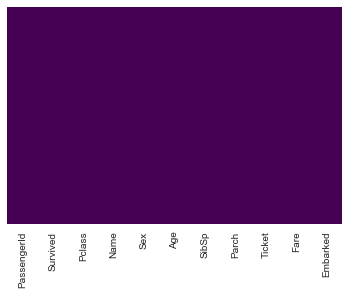

In [21]:
#data is clean from 
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [51]:

data1.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

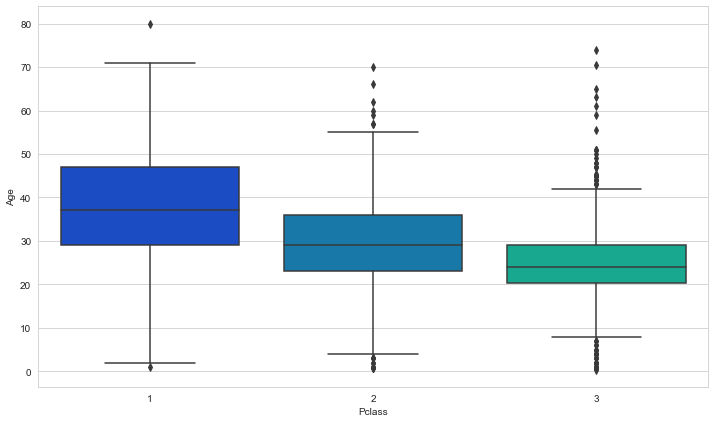

In [23]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=data,palette='winter')

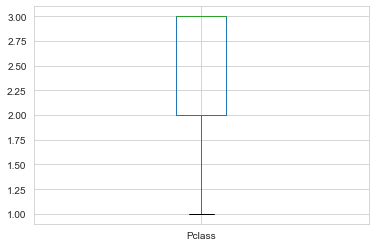

In [24]:
data.boxplot(column=['Pclass'])

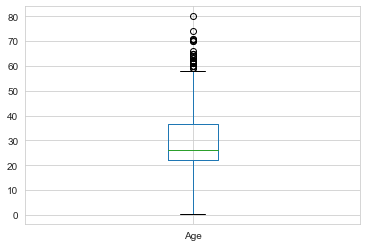

In [25]:
data.boxplot(column=['Age'])

2) removing outliers

In [26]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [52]:
data_outlier = remove_outlier(data,"Pclass")
data_outlier1 = remove_outlier(data1,"Pclass")


In [53]:
data_outlier = remove_outlier(data_outlier,"Age")
data_outlier1 = remove_outlier(data_outlier1,"Age")
data.shape

(889, 11)

In [57]:
data_outlier1.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,S


# DATA TRAINING AND TESTING

In [63]:
sex = pd.get_dummies(data_outlier["Sex"],drop_first = True)
sex1 = pd.get_dummies(data_outlier1["Sex"],drop_first = True)

In [64]:
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [61]:
embark = pd.get_dummies(data_outlier["Embarked"],drop_first = True)
embark1 = pd.get_dummies(data_outlier1["Embarked"],drop_first = True)

In [33]:
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [60]:
Pclass = pd.get_dummies(data_outlier["Pclass"],drop_first = True)
Pclass1 = pd.get_dummies(data_outlier1["Pclass"],drop_first = True)

In [35]:
Pclass.head()

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [69]:
data= pd.concat([data_outlier,embark,Pclass,sex],axis = 1)
data1= pd.concat([data_outlier1,embark1,Pclass1,sex1],axis = 1)

In [70]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Q,S,2,3,male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,1,0,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,1,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,1,0,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,1,0,1,1


In [71]:
data.drop(['Pclass','Sex','PassengerId','Name','Ticket','Embarked'],axis = 1,inplace = True)
data1.drop(['Pclass','Sex','PassengerId','Name','Ticket','Embarked'],axis = 1,inplace = True)


In [85]:
data1.shape

(388, 9)

# ALGORITHM

In [86]:
X = data.drop("Survived",axis =1)
y = data["Survived"]
pred = data1

In [87]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)
from sklearn.linear_model import LogisticRegression

In [88]:
logmodel = LogisticRegression(solver = 'liblinear')

In [89]:
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [90]:
pred=logmodel.predict(X_test)

In [91]:

confusion_matrix = pd.crosstab(y_test, pred, rownames=['Actual'], colnames=['Predicted'])

In [92]:
confusion_matrix 

Predicted,0,1
Actual,,
0,140,21
1,24,74


method 2

In [93]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [95]:
confusion_matrix(y_test,pred)

array([[140,  21],
       [ 24,  74]], dtype=int64)

In [97]:
classification_report(y_test,pred)

'              precision    recall  f1-score   support\n\n           0       0.85      0.87      0.86       161\n           1       0.78      0.76      0.77        98\n\n    accuracy                           0.83       259\n   macro avg       0.82      0.81      0.81       259\nweighted avg       0.83      0.83      0.83       259\n'

In [98]:
accuracy_score(y_test,pred)

0.8262548262548263

In [99]:
logmodel.score(X,y)

0.8004640371229699

In [100]:
prediction = logmodel.predict(data1)

In [103]:
prediction

array([0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,

In [107]:
survived = dataframe=pd.DataFrame(prediction, columns=['survived'])

In [108]:

survived.head()

,survived
0,0
1,0
2,0
3,1
4,0


In [111]:
gender = data_outlier["Sex"]

In [112]:
data = pd.concat([gender,survived],axis = 1)

In [113]:
data.head()

,Sex,survived
0,male,0.0
1,female,0.0
2,female,0.0
3,female,1.0
4,male,0.0


In [118]:
export_csv = data.to_csv(r'C:\Users\MAVERICK PC\data.csv',index = None , header = True)